In [1]:
import os

print(f"Current working directory: {os.getcwd()}")
from pathlib import Path
import sys
# Add the parent src directory to sys.path to find configs and helper modules (acts differently for different OS)
src_dir = Path().cwd().parent
if str(src_dir) not in sys.path:
    sys.path.insert(0, str(src_dir))

from esc50.esc50_dataset import ESC50Dataset
from configs.configs_aggregate import load_configs
import yaml
from helper.datamodule_factory import create_datamodule
from icecream import ic
import torch
import numpy as np
import sys
from models.model_factory import ModelFactory
from helper.ptl_trainer import PTLTrainer
from pathlib import Path
from torchinfo import summary

Current working directory: c:\Users\Sidewinders\Desktop\CODE\UAV_Classification_repo\src\esc50


c:\Users\Sidewinders\Desktop\CODE\UAV_Classification_repo\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
print("_"*40+"\n")
# Load configuration
with open('../configs/config.yaml', 'r') as file:
    config = yaml.safe_load(file)

# Change datapath for the sake of the ipynb's pathing
config['dataset']['data_path'] = "../datasets/ESC-50-master/classes"

(general_config, 
    feature_extraction_config,
    dataset_config,  
    peft_config, 
    wandb_config,
    sweep_config, 
    augmentation_config) = load_configs(config)


print("_"*40+"\n")

# Set random seeds for reproducibility
torch.manual_seed(general_config.seed)
torch.cuda.manual_seed(general_config.seed)
np.random.seed(general_config.seed)


# Create data module using the factory
data_module = create_datamodule(
    general_config=general_config,
    feature_extraction_config=feature_extraction_config,
    dataset_config=dataset_config,
    augmentation_config=augmentation_config
)
ic("Created the audio data module")

# Setup data module (this will also save dataloaders if save_dataloader is True)
data_module.setup()
ic("Setup the data module")

ic| 'GeneralConfig instance created successfully:'
ic| 'FeatureExtractionConfig instance created successfully:'
ic| 'DatasetConfig instance created successfully:'
ic| '

PeftConfig instance created successfully:'
ic| 'WandbConfig instance created successfully:'
ic| 'SweepConfig instance created successfully:'
ic| 'AugmentationConfig instance created successfully:'
ic| f"Creating datamodule for dataset type: {dataset_type}": 'Creating datamodule for dataset type: esc50'
ic| 'Creating ESC-50 datamodule'
ic| "Warning: ESC-50 k-fold cross-validation doesn't use separate test sets. test_size will be ignored.": ("Warning: ESC-50 k-fold cross-validation doesn't use separate test sets. "
                                                                                                           'test_size will be ignored.')
ic| "Warning: ESC-50 k-fold cross-validation doesn't use separate inference sets. inference_size will be ignored.": ("Warning: ESC-50 k-fold cross-validation doesn't use separate inference sets. "
                                                                                                                     'inference_size will be ignore

________________________________________

________________________________________



ic| 'Created the audio data module'
ic| 'Setting up ESC-50 k-fold cross-validation'
ic| 'Using filename-based k-fold splitting (faster, no CSV required)'


Found 1600 files across folds: [2, 3, 4, 5]
  Fold 2: 400 files
  Fold 3: 400 files
  Fold 4: 400 files
  Fold 5: 400 files
Found 400 files across folds: [1]
  Fold 1: 400 files
Fold 1 (validation): Train: 1600, Val: 400
Found 1600 files across folds: [1, 3, 4, 5]
  Fold 1: 400 files
  Fold 3: 400 files
  Fold 4: 400 files
  Fold 5: 400 files
Found 400 files across folds: [2]
  Fold 2: 400 files
Fold 2 (validation): Train: 1600, Val: 400
Found 1600 files across folds: [1, 2, 4, 5]
  Fold 1: 400 files
  Fold 2: 400 files
  Fold 4: 400 files
  Fold 5: 400 files
Found 400 files across folds: [3]
  Fold 3: 400 files
Fold 3 (validation): Train: 1600, Val: 400
Found 1600 files across folds: [1, 2, 3, 5]
  Fold 1: 400 files
  Fold 2: 400 files
  Fold 3: 400 files
  Fold 5: 400 files
Found 400 files across folds: [4]
  Fold 4: 400 files
Fold 4 (validation): Train: 1600, Val: 400
Found 1600 files across folds: [1, 2, 3, 4]
  Fold 1: 400 files
  Fold 2: 400 files
  Fold 3: 400 files
  Fold 4: 40

ic| f"K-fold setup complete - {len(self.fold_datasets)} folds created": 'K-fold setup complete - 5 folds created'
ic| f"Fold {fold_num}: Train={len(train_dataset.file_names)}, Val={len(val_dataset.file_names)}": 'Fold 1: Train=1600, Val=400'
ic| f"  Train folds: {train_dataset.get_fold_statistics()}": '  Train folds: {2: 400, 3: 400, 4: 400, 5: 400}'
ic| f"  Val folds: {val_dataset.get_fold_statistics()}": '  Val folds: {1: 400}'
ic| f"Fold {fold_num}: Train={len(train_dataset.file_names)}, Val={len(val_dataset.file_names)}": 'Fold 2: Train=1600, Val=400'
ic| f"  Train folds: {train_dataset.get_fold_statistics()}": '  Train folds: {1: 400, 3: 400, 4: 400, 5: 400}'
ic| f"  Val folds: {val_dataset.get_fold_statistics()}": '  Val folds: {2: 400}'
ic| f"Fold {fold_num}: Train={len(train_dataset.file_names)}, Val={len(val_dataset.file_names)}": 'Fold 3: Train=1600, Val=400'
ic| f"  Train folds: {train_dataset.get_fold_statistics()}": '  Train folds: {1: 400, 2: 400, 4: 400, 5: 400}'
ic| f" 

Fold 5 (validation): Train: 1600, Val: 400


fold_idx+1}: Train: {len(self.train_dataset)}, Val: {len(self.val_dataset)}": 'Set to fold 1: Train: 1600, Val: 400'
ic| f"ESC-50 datasets created in {dataset_init_time:.2f} seconds": 'ESC-50 datasets created in 10.59 seconds'
ic| 'Setup the data module'


'Setup the data module'

In [3]:
data_module.set_fold(2)
len(data_module.train_dataloader().dataset.file_names)


# data_module.train_dataloader().dataset.audio_tensors.shape
# len(data_module.val_dataloader().dataset.file_names)

# data_module.val_dataloader().dataset.audio_tensors.shape

ic| f"Set to fold {fold_idx+1}: Train: {len(self.train_dataset)}, Val: {len(self.val_dataset)}": 'Set to fold 3: Train: 3200, Val: 400'


1600

ic| "sample's class: ", class_index: 7


ic| "sample's input shape: ": "sample's input shape: "
    sample_input.shape: torch.Size([128, 157])
ic| "sample's path: ": "sample's path: "
    data_module.train_dataloader().dataset.paths[idx]: '..\\datasets\\ESC-50-master\\classes\\chirping_birds\\1-38560-A-14.wav'


(1, 80000)


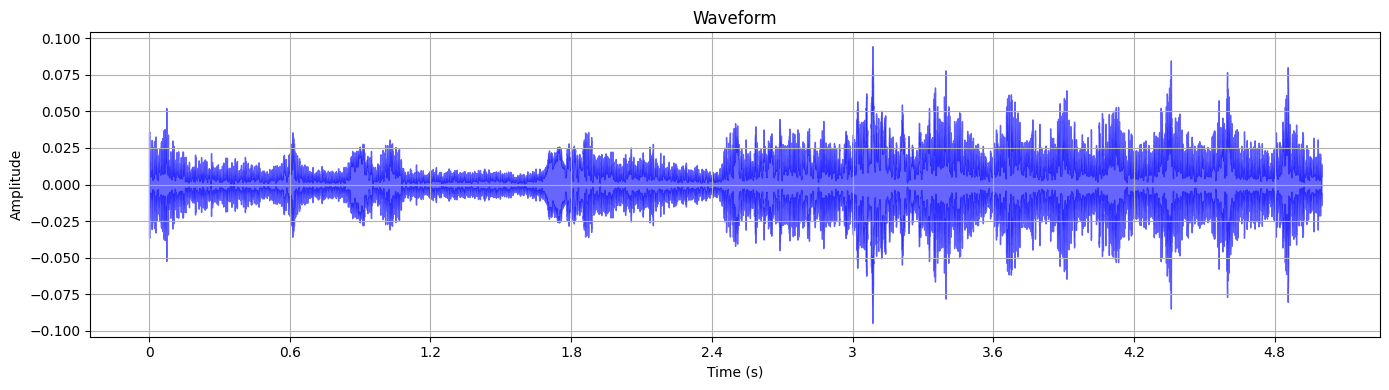

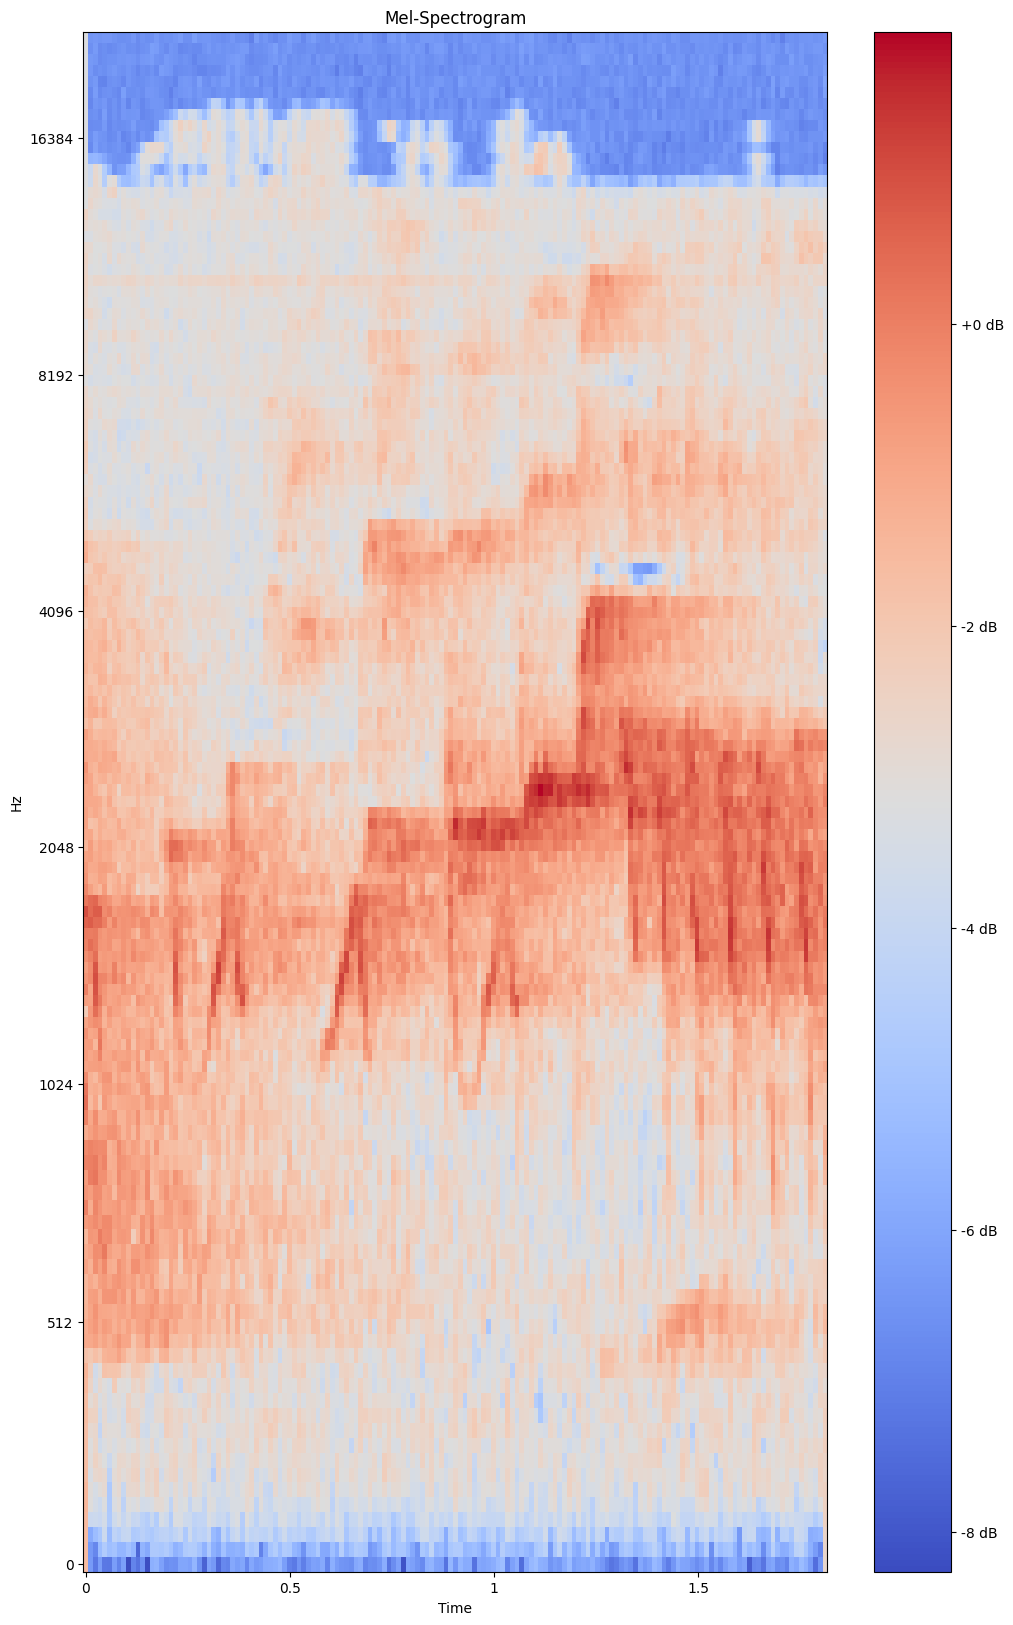

In [4]:
import librosa
import matplotlib.pyplot as plt
idx = 60
# class_map = data_module.train_dataloader().dataset.idx_to_class
# ic("sample's class: ", class_map[idx])
# sample_input, class = data_module.train_dataloader().dataset[idx]
sample_input, class_index = data_module.train_dataloader().dataset[idx]

audio = data_module.train_dataloader().dataset.audio_tensors[idx]
sample_input = sample_input.squeeze(0)  # remove batch dimension if needed
ic("sample's class: ", class_index)
ic("sample's input shape: ", sample_input.shape)
ic("sample's path: ", data_module.train_dataloader().dataset.paths[idx])
sr = 16000
raw_audio = audio.numpy()  # Convert to numpy array if it's a tensor
print(raw_audio.shape)
# Calculate the maximum amplitude across both audio signals
max_amplitude = ((np.abs(raw_audio)))

plt.figure(figsize=(14, 4))
librosa.display.waveshow(raw_audio, sr=sr, alpha=0.6, color='b')
plt.title("Waveform")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.tight_layout()
plt.grid(True)
plt.show()

data_module.train_dataloader().dataset.show_spectrogram(sample_input)